In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import pyproj
from fiona.crs import from_epsg
import numpy as np
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from geopandas import GeoDataFrame

%matplotlib inline
mpl.rc('font', family='NanumGothic') #한글 폰트 적용시
plt.rcParams["figure.figsize"] = (20,10)
plt.rc('font', family='NanumGothic')

In [43]:
geo_shp = gpd.read_file("./standard/geo_seoul.shp", encoding="utf-8")
geo_shp.head()

,SIG_CD,latitude,longitude,SIG_KOR_NM,SG_NM,geometry
0,11110,37.594920,126.977317,종로구,서울특별시,"POLYGON ((127.00864 37.58047, 127.00871 37.580..."
1,11140,37.560143,126.995968,중구,서울특별시,"POLYGON ((127.02314 37.57196, 127.02336 37.571..."
2,11170,37.531386,126.979908,용산구,서울특별시,"POLYGON ((126.96918 37.55566, 126.96917 37.554..."
3,11200,37.551030,127.041059,성동구,서울특별시,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
4,11215,37.546722,127.085746,광진구,서울특별시,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."


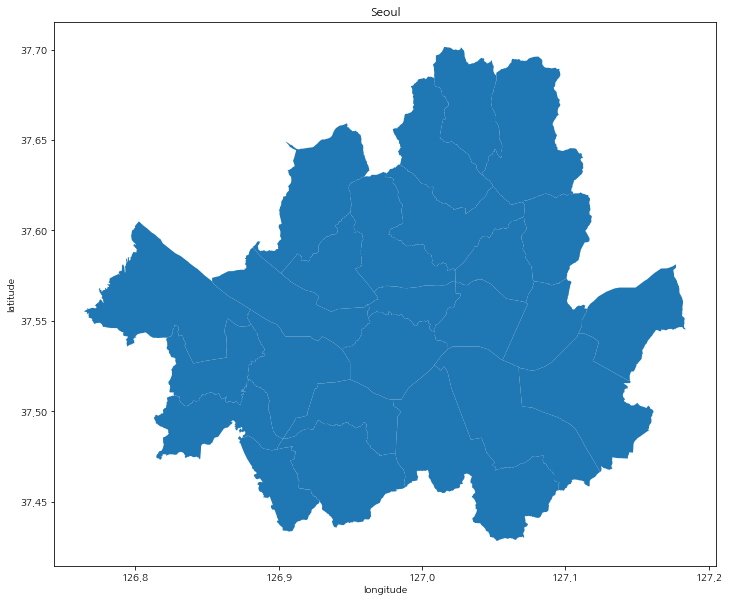

In [44]:
geo_shp.plot()
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Seoul")
plt.show()

In [46]:
target = [True if i in ["광진구", "동대문구", "성동구", "중랑구"] else False for i in geo_shp.SIG_KOR_NM]
geo_shp["target"] = target
geo_shp.head()

,SIG_CD,latitude,longitude,SIG_KOR_NM,SG_NM,geometry,target
0,11110,37.594920,126.977317,종로구,서울특별시,"POLYGON ((127.00864 37.58047, 127.00871 37.580...",False
1,11140,37.560143,126.995968,중구,서울특별시,"POLYGON ((127.02314 37.57196, 127.02336 37.571...",False
2,11170,37.531386,126.979908,용산구,서울특별시,"POLYGON ((126.96918 37.55566, 126.96917 37.554...",False
3,11200,37.551030,127.041059,성동구,서울특별시,"POLYGON ((127.04341 37.57234, 127.04524 37.571...",True
4,11215,37.546722,127.085746,광진구,서울특별시,"POLYGON ((127.10166 37.57240, 127.10224 37.572...",True


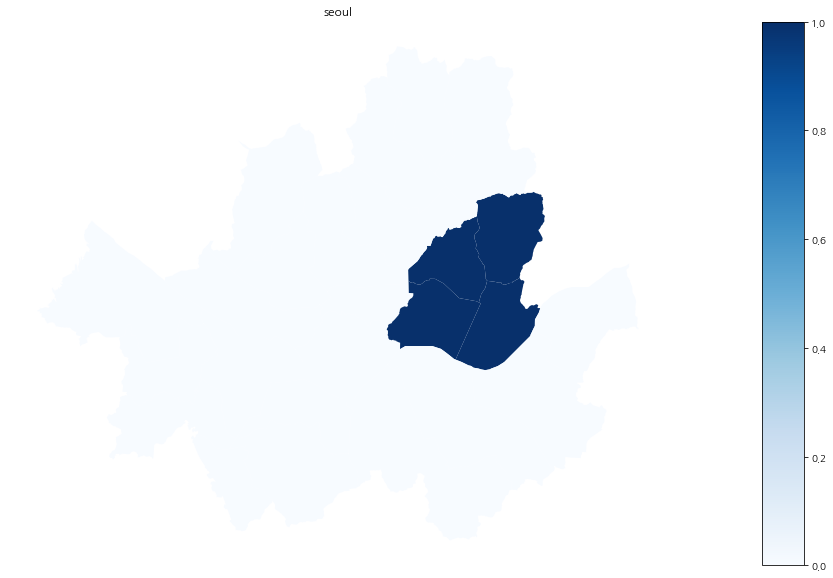

In [20]:
fig, ax = plt.subplots(1, 1)
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
# 시각화
column = 'target'
geo_shp.plot(column, ax=ax, legend=True, cax=cax, cmap='Blues')
ax.set_title("seoul")
ax.set_axis_off()
plt.show()

In [26]:
target_shp = geo_shp[geo_shp.target == 1]
target_shp.reset_index(inplace=True)
target_shp.drop(["index", 'SG_NM', "target"], axis=1, inplace=True)
target_shp

C:\Users\skyri\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SIG_CD,latitude,longitude,SIG_KOR_NM,geometry
0,11200,37.551030,127.041059,성동구,"POLYGON ((127.04341 37.57234, 127.04524 37.571..."
1,11215,37.546722,127.085746,광진구,"POLYGON ((127.10166 37.57240, 127.10224 37.572..."
2,11230,37.581957,127.054848,동대문구,"POLYGON ((127.07108 37.60732, 127.07117 37.606..."
3,11260,37.597819,127.092884,중랑구,"POLYGON ((127.11131 37.62069, 127.11214 37.620..."


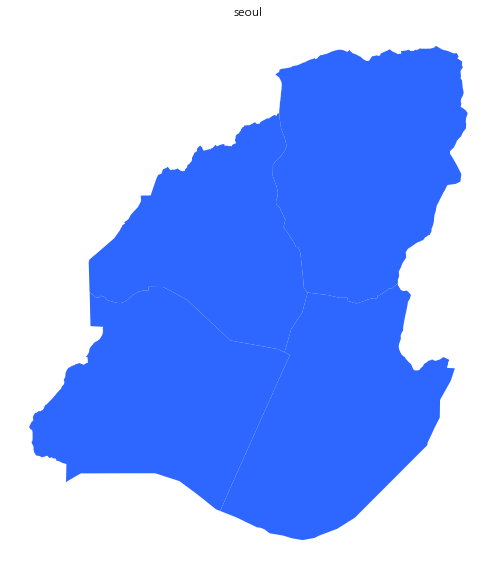

In [34]:
fig, ax = plt.subplots(1, 1)
target_shp.plot(ax=ax,color="#2E67FF")
ax.set_title("seoul")
ax.set_axis_off()
plt.show()

In [40]:
bike_corr = pd.read_csv("./standard/bike_corr.csv", encoding="utf-8")
bike_corr.drop(['Unnamed: 0'], axis=1, inplace=True)
bike_corr.head()

,위도,경도
0,37.547070,127.074272
1,37.537308,127.070351
2,37.531860,127.067192
3,37.537010,127.082245
4,37.549061,127.057793


In [50]:
geo_target = geo_shp[geo_shp.target==True]
geo_target.reset_index(drop=True, inplace=True)
geo_target

,SIG_CD,latitude,longitude,SIG_KOR_NM,SG_NM,geometry,target
0,11200,37.551030,127.041059,성동구,서울특별시,"POLYGON ((127.04341 37.57234, 127.04524 37.571...",True
1,11215,37.546722,127.085746,광진구,서울특별시,"POLYGON ((127.10166 37.57240, 127.10224 37.572...",True
2,11230,37.581957,127.054848,동대문구,서울특별시,"POLYGON ((127.07108 37.60732, 127.07117 37.606...",True
3,11260,37.597819,127.092884,중랑구,서울특별시,"POLYGON ((127.11131 37.62069, 127.11214 37.620...",True


In [64]:
corr_l=[]

for i in range(len(bike_corr)):
    data = bike_corr.iloc[i]
    x = data["경도"]
    y = data["위도"]
    point = Point(x,y)
    corr_l.append(point)

corr = dict()
corr["geometry"] = corr_l
corr_df = pd.DataFrame(corr)
corr_df.head()

C:\Users\skyri\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


,geometry
0,POINT (127.0742722 37.54706955)
1,POINT (127.0703507 37.53730774)
2,POINT (127.0671921 37.53186035)
3,POINT (127.0822449 37.53701019)
4,POINT (127.0577927 37.54906082)


In [71]:
geometry = corr_df.geometry
corr_gdf = GeoDataFrame(corr_df, crs="EPSG:4326", geometry=geometry)

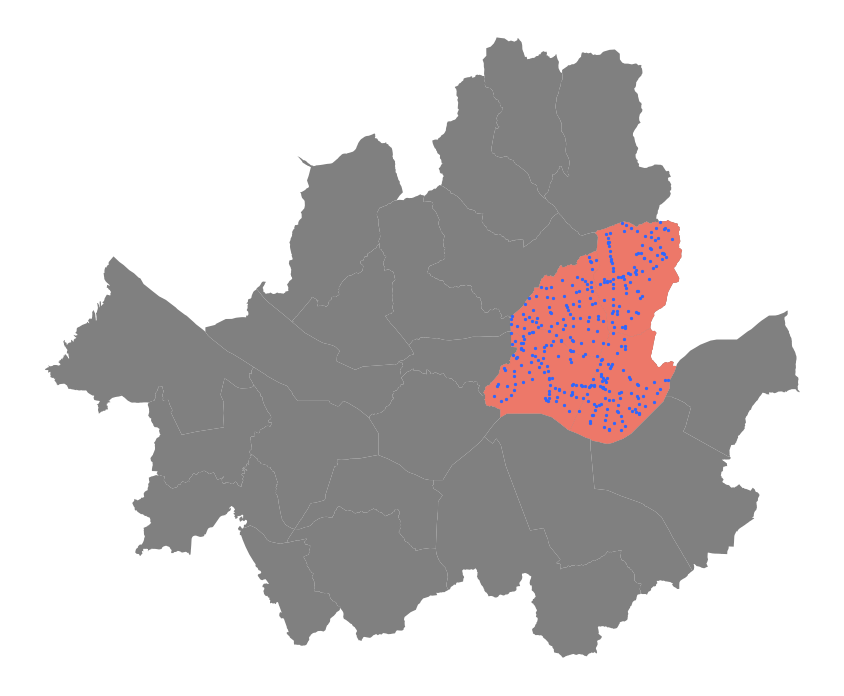

In [73]:
fig, ax = plt.subplots()
geo_shp.plot(ax=ax, facecolor='gray');
geo_target.plot(ax=ax, facecolor='#ED7869');
corr_gdf.plot(ax=ax, color='#2E67FF', markersize=5);
plt.tight_layout();
ax.set_axis_off()